# **1️⃣1️⃣ Kernel in SVMs: Its Purpose & How It Transforms Data 🔮📊🚀**

## **💡 Real-Life Analogy: Upgrading Your Vision in a Football Match ⚽👀**

Imagine you're a football coach trying to decide which teams are likely to win.  
- In the **original view**, team stats (like shots, possession, defense) look jumbled together—it's hard to draw a clear line between winners and losers.  
- Now, imagine you have a special pair of glasses 🔮 that **transforms the field**: suddenly, the teams split into two distinct groups!  
- **This transformation is what a kernel does in SVMs**: it maps your data into a higher-dimensional space where a simple straight line (or hyperplane) can easily separate the classes. 🎯✨

## **📌 What Is a Kernel in SVMs?**

✅ A **kernel** is a function that **implicitly maps input data into a higher-dimensional feature space** without having to compute the coordinates of that space explicitly.  
✅ It allows an SVM to **find a linear separating hyperplane** in this new space even if the data is **not linearly separable** in the original input space.

### **Mathematical Insight**

- Suppose we have a mapping:  
  $$
  \Phi: \mathbb{R}^n \rightarrow \mathbb{R}^m \quad \text{(with } m \gg n \text{)}
  $$
- Instead of computing $\Phi(x)$ directly, we use a **kernel function** $K(x, y)$ defined as:  
  $$
  K(x, y) = \langle \Phi(x), \Phi(y) \rangle
  $$
  This is known as the **kernel trick** and it saves enormous computational effort! 💡🚀

## **🔍 Types of Kernels & Their Impact**

Here are a few popular kernels with a quick comparison:

| **Kernel**            | **Mathematical Expression**                     | **When to Use**                               | **Emoji Summary**          |
|-----------------------|-------------------------------------------------|-----------------------------------------------|----------------------------|
| **Linear Kernel**     | $ K(x,y) = x^\top y $                          | When data is already linearly separable.      | ➡️📏                        |
| **Polynomial Kernel** | $ K(x,y) = (x^\top y + c)^d $                  | When relationships are non-linear but polynomial. | 🧮📈                    |
| **RBF (Gaussian) Kernel** | $ K(x,y) = \exp\left(-\gamma \|x-y\|^2\right) $ | For complex, non-linear boundaries.           | 🔥🌌                        |

✅ **Key Point**: The **kernel function** transforms your data into a space where a **simple linear decision boundary** can separate complex patterns. This is crucial in sports analytics where performance data might be very non-linear.

## **📊 Sports Examples Using Kernels**

### **⚽ Football Example: Separating Winning and Losing Teams**

- **Scenario**: You have data on teams including **Shots on Target, Possession %, and Opponent Strength**.  
- **Challenge**: In the original feature space, these stats may overlap between winners and losers.  
- **Solution**:  
  - Use an **RBF kernel** to map the data into a higher-dimensional space.  
  - In that space, an SVM can find a **clear hyperplane** that separates winning teams (e.g., marked as 1) from losing teams (e.g., marked as 0).  
- **Real-Life Impact**: Coaches get a **clear decision boundary** to predict match outcomes reliably! ⚽💥

### **🏀 NBA Example: Classifying All-Star vs. Non-All-Star Players**

- **Scenario**: Player performance metrics (Points, Assists, Rebounds) might be **non-linearly separable** between All-Stars and non-All-Stars.  
- **Solution**:  
  - Apply a **Polynomial kernel** to transform the data.  
  - The SVM then finds an optimal hyperplane in this **higher-dimensional polynomial space**.  
- **Real-Life Impact**: Teams can better **identify hidden talent** by robustly separating stars from the rest! 🏀✨

### **♠️ Texas Hold’em Poker Example: Classifying Strong vs. Weak Hands**

- **Scenario**: Features like **hand strength, position, and betting patterns** may not linearly separate strong from weak hands.  
- **Solution**:  
  - Use an **RBF kernel** to capture the **complex, non-linear relationships** in the data.  
- **Real-Life Impact**: Poker analysts can **more accurately simulate and strategize** using the improved classification! ♠️♥️💡

## **🛠️ Python Code Example: SVM with Kernel Trick for Football Data**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Set seed for reproducibility 🔒
np.random.seed(42)

In [14]:
# Generate synthetic football data:
# Features: [Shots on Target (0-10), Possession % (30-100), Opponent Strength (0-10)]
n_samples = 300
shots = np.random.randint(0, 11, n_samples)
possession = np.random.randint(30, 101, n_samples)
opp_strength = np.random.randint(0, 11, n_samples)


In [15]:
X = np.vstack([shots, possession, opp_strength]).T.astype(float)
# Synthetic target: If (Shots*0.4 + Possession*0.01 - OppStrength*0.3) > 2, then Win (1) else Loss (0) 😎⚽
y = (shots * 0.4 + possession * 0.01 - opp_strength * 0.3 > 2).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Standardize features (important for SVM performance) 📏
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Create and train the SVM classifier with an RBF kernel 🌌
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [18]:
# Evaluate the model
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"⚽ Football SVM (RBF Kernel) Accuracy: {accuracy*100:.2f}%")

⚽ Football SVM (RBF Kernel) Accuracy: 97.78%


In [19]:
# Visualize the decision boundary using only the first two features for 2D illustration 📈🎨
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Use first two features for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    # Create grid of points with dummy third feature (set to mean of feature 3)
    dummy_feature = np.mean(X[:, 2])
    X_grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, dummy_feature)]
    X_grid_scaled = scaler.transform(X_grid)
    Z = model.predict(X_grid_scaled)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Shots on Target (scaled)")
    plt.ylabel("Possession % (scaled)")
    plt.title(title)
    plt.show()

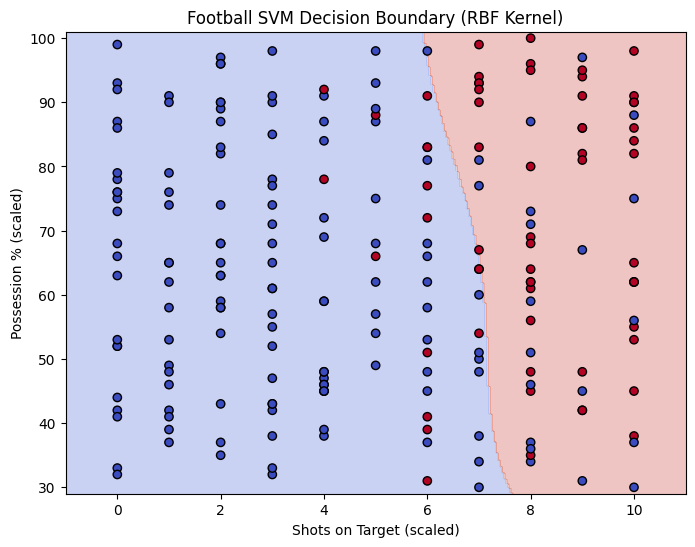

In [20]:
plot_decision_boundary(svm_model, X_train, y_train, title="Football SVM Decision Boundary (RBF Kernel)")

## **🚀 Python Code Example: SVM with Kernel Trick for NBA Data**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# Set seed for reproducibility 🔒
np.random.seed(42)

In [24]:
# Generate synthetic NBA data:
# Features: [Points Per Game (80-120), Combined Assists+Rebounds (10-50), Team Efficiency (30-80)]
n_samples_nba = 300
ppg = np.random.randint(80, 121, n_samples_nba)
asst_reb = np.random.randint(10, 51, n_samples_nba)
efficiency = np.random.randint(30, 81, n_samples_nba)

In [25]:
X_nba = np.vstack([ppg, asst_reb, efficiency]).T.astype(float)
# Synthetic target: if (PPG*0.05 + (Assists+Rebounds)*0.1 + Efficiency*0.02) > 10 then Win (1) else Loss (0) 🏀✨
y_nba = ((ppg*0.05 + asst_reb*0.1 + efficiency*0.02) > 10).astype(int)

In [26]:
# Split data into training and testing sets
X_train_nba, X_test_nba, y_train_nba, y_test_nba = train_test_split(X_nba, y_nba, test_size=0.3, random_state=42)

In [27]:
# Standardize features
scaler_nba = StandardScaler()
X_train_nba_scaled = scaler_nba.fit_transform(X_train_nba)
X_test_nba_scaled = scaler_nba.transform(X_test_nba)

In [28]:
# Create and train the SVM classifier with a Polynomial kernel 🔮
svm_nba = svm.SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_nba.fit(X_train_nba_scaled, y_train_nba)

SVC(kernel='poly', random_state=42)

In [29]:
# Evaluate the model
nba_accuracy = svm_nba.score(X_test_nba_scaled, y_test_nba)
print(f"🏀 NBA SVM (Polynomial Kernel) Accuracy: {nba_accuracy*100:.2f}%")

🏀 NBA SVM (Polynomial Kernel) Accuracy: 91.11%


In [30]:
# Visualize Decision Boundary (using first two features for 2D plotting)
def plot_decision_boundary_nba(model, X, y, title="Decision Boundary"):
    # Use first two features for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    dummy_feature = np.mean(X[:, 2])
    X_grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, dummy_feature)]
    X_grid_scaled = scaler_nba.transform(X_grid)
    Z = model.predict(X_grid_scaled)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Points Per Game (scaled)")
    plt.ylabel("Assists+Rebounds (scaled)")
    plt.title(title)
    plt.show()

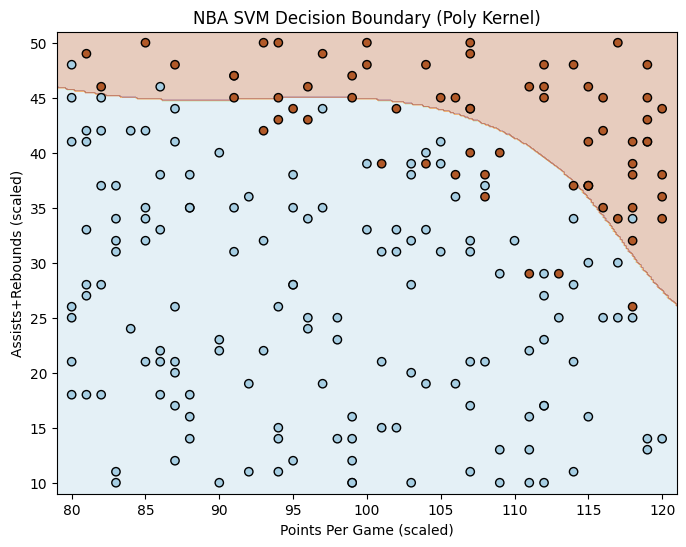

In [31]:
plot_decision_boundary_nba(svm_nba, X_train_nba, y_train_nba, title="NBA SVM Decision Boundary (Poly Kernel)")

## **🔥 Final Takeaways**

1️⃣ **Purpose of a Kernel**:  
   - It **transforms data** from its original space into a **higher-dimensional feature space** where it becomes **linearly separable**. 🔮📈  
   - Enables SVMs to **find a linear hyperplane** in this transformed space, even when data is **non-linearly separable** in the original space. 🎯✨

2️⃣ **Kernel Trick**:  
   - Instead of explicitly computing the transformation $\Phi(x)$, the kernel function $K(x,y) = \langle \Phi(x), \Phi(y) \rangle$ computes the **inner product** in the transformed space efficiently. 🚀💡

3️⃣ **Sports Examples**:  
   - **Football**: Distinguishing winners and losers by transforming match stats using an RBF kernel. ⚽🔥  
   - **NBA**: Separating All-Stars from non-All-Stars with a Polynomial kernel that captures non-linear relationships in performance metrics. 🏀⭐  
   - **Poker**: (Conceptually) Using kernels to classify strong vs. weak hands based on multi-dimensional betting patterns. ♠️♥️

4️⃣ **Python Code**:  
   - Two detailed examples show how to build and evaluate SVM classifiers using different kernels with synthetic sports data.  
   - Visualizations such as decision boundary plots make the concept **intuitive** for both technical and non-technical audiences. 📊🎨